In [0]:
import tensorflow as tf
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import numpy as np
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Directory with our training malignant pictures 
train_mg_dir = pathlib.Path('/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/malignant')

# Directory with our training benign pictures
train_bg_dir = pathlib.Path('/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/benign')

# Directory with our training malignant pictures
validation_mg_dir = pathlib.Path('/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/test/malignant')

# Directory with our training benign pictures
validation_bg_dir = pathlib.Path('/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/test/benign')


print('total training malignant images:', len(list(train_mg_dir.glob('*'))))
train_mg_names = list(train_mg_dir.glob('*'))
print(list(map(str,train_mg_names[:5])),"\n\n")


print('total training benign images:', len(list(train_bg_dir.glob('*'))))
train_bg_names = list(train_bg_dir.glob('*'))
print(list(map(str,train_bg_names[:5])),"\n\n")


print('total validation malignant images:', len(list(validation_mg_dir.glob('*'))))
validation_mg_names = list(validation_mg_dir.glob('*'))
print(list(map(str,validation_mg_names[:5])),"\n\n")


print('total validation benign images:', len(list(validation_bg_dir.glob('*'))))
validation_bg_names = list(validation_bg_dir.glob('*'))
print(list(map(str,validation_bg_names[:5])))


total training malignant images: 1197
['/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/malignant/398.jpg', '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/malignant/159.jpg', '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/malignant/1142.jpg', '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/malignant/1397.jpg', '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/malignant/165.jpg'] 


total training benign images: 1440
['/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/benign/1709.jpg', '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/benign/470.jpg', '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/benign/1053.jpg', '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/benign/302.jpg', '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train/benign/458.jpg'] 


total validation malignant images: 300
['/content/

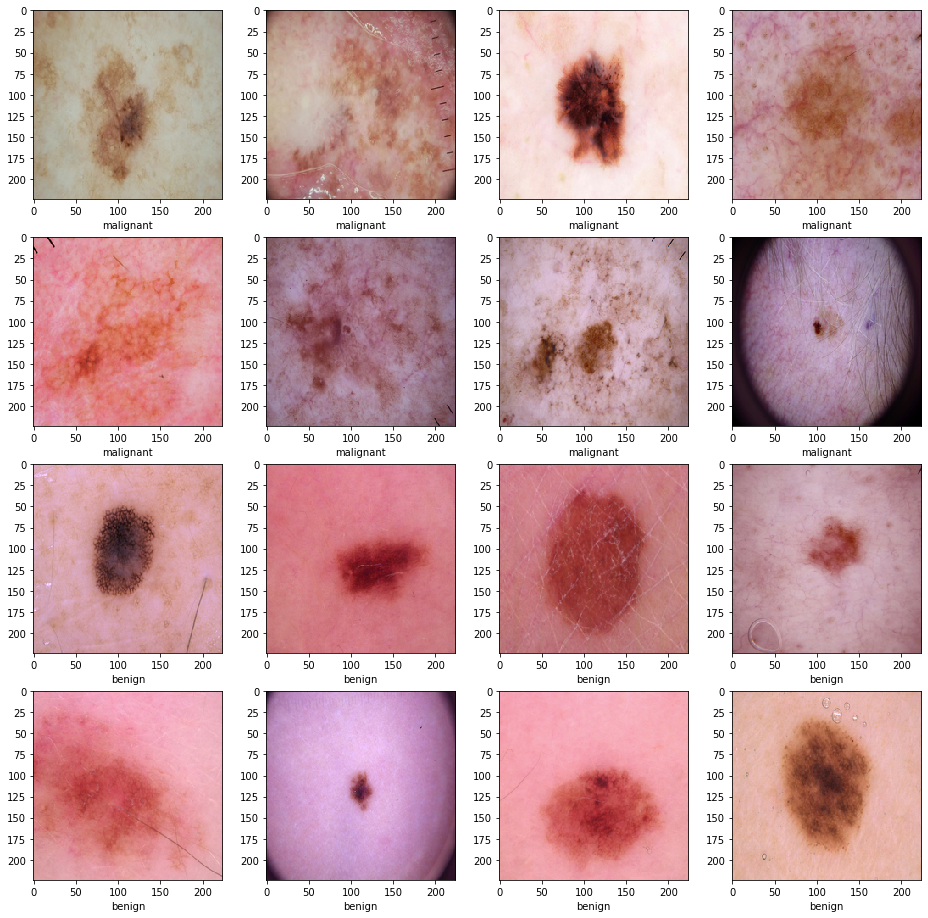

In [0]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)


pic_index += 8
next_mg_pix = [os.path.join(train_mg_dir, fname) 
                for fname in train_mg_names[pic_index-8:pic_index]]
next_bg_pix = [os.path.join(train_bg_dir, fname) 
                for fname in train_bg_names[pic_index-8:pic_index]]
k=0
label="malignant"
for i, img_path in enumerate(next_mg_pix+next_bg_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  #sp.axis('Off') # Don't show axes (or gridlines)
  k+=1
  if(k==17):
    label="benign"
  
  img = mpimg.imread(img_path)
  sp.set_xlabel(label)
  plt.imshow(img)
  k=k+1
  

plt.show()








In [0]:
#creating a cnn consisting of 
model = tf.keras.models.Sequential([
        # This is the first convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 .
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 21, 21, 64)       

In [0]:

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0005),
              metrics=['acc'])

In [0]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches  using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/train',  # This is the source directory for training images
        target_size=(200,200),  # All images will be resized to 200x200
        batch_size=200,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/skin-cancer-malignant-vs-benign/data/test',  # This is the source directory for training images
        target_size=(200,200),  # All images will be resized to 200x200
        batch_size=60,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  
      epochs=40,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=10)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 10 steps
Epoch 1/40
10/10 [==============================] - 51s 5s/step - loss: 0.7280 - acc: 0.5590 - val_loss: 0.6690 - val_acc: 0.5450
Epoch 2/40
10/10 [==============================] - 49s 5s/step - loss: 0.6814 - acc: 0.5999 - val_loss: 0.7268 - val_acc: 0.4600
Epoch 3/40
10/10 [==============================] - 55s 5s/step - loss: 0.6514 - acc: 0.6340 - val_loss: 0.6043 - val_acc: 0.7050
Epoch 4/40
10/10 [==============================] - 53s 5s/step - loss: 0.5853 - acc: 0.7284 - val_loss: 0.5373 - val_acc: 0.7767
Epoch 5/40
10/10 [==============================] - 55s 5s/step - loss: 0.5904 - acc: 0.6859 - val_loss: 0.5117 - val_acc: 0.7400
Epoch 6/40
10/10 [==============================] - 55s 6s/step - loss: 0.5445 - acc: 0.7333 - val_loss: 0.5338 - val_acc: 0.6900
Epoch 7/40
10/10 [==============================] - 51s 5s/step - loss: 0.5574 - acc: 0.7295 - val_loss: 0.5159 - val_acc: 0.738

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


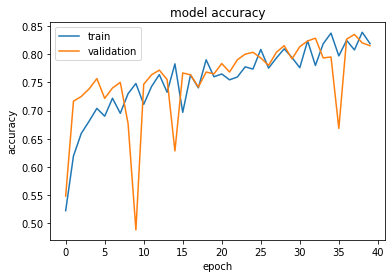

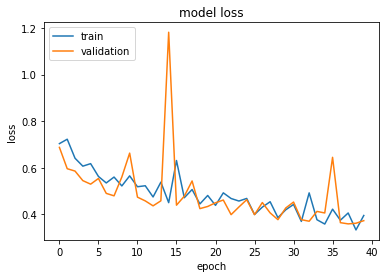

In [0]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
import matplotlib.pyplot as plt
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/Users/joker/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


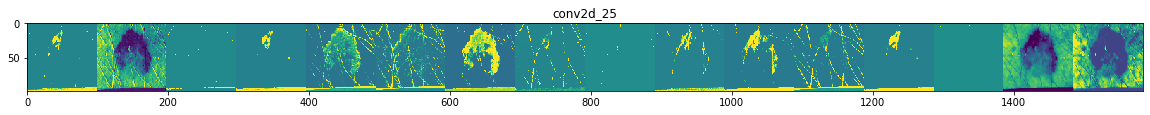

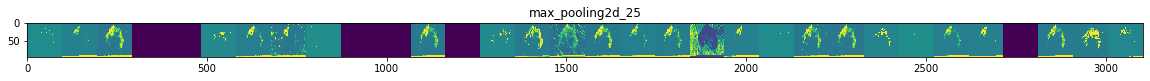

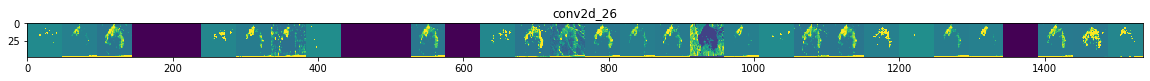

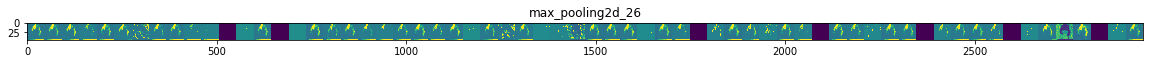

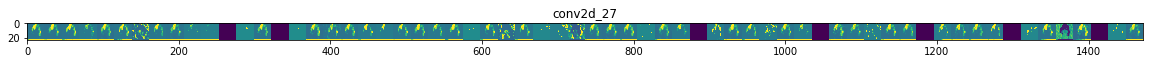

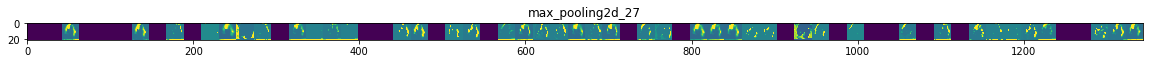

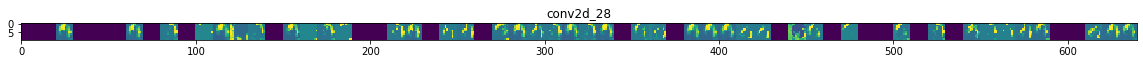

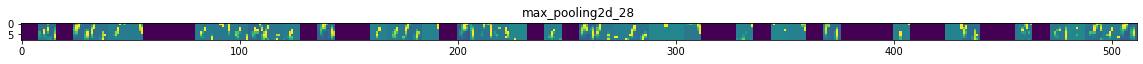

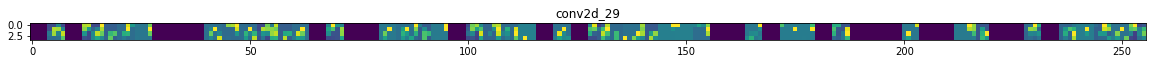

In [0]:

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image from the training set.
mg_img_files = [os.path.join(train_mg_dir, f) for f in train_mg_names]
bg_img_files = [os.path.join(train_bg_dir, f) for f in train_bg_names]
img_path = random.choice(mg_img_files + bg_img_files)

img = load_img(img_path, target_size=(200, 200))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

/Users/joker/Desktop/data/prediction/images.jpeg


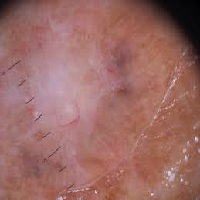

[0.67809063]
malignant


In [0]:
data_dir = pathlib.Path('/Users/joker/Desktop/data/prediction')
image_c = (list(data_dir.glob('*')))
print(str(image_c[0]))
path=str(image_c[0])
img = image.load_img(path, target_size=(200, 200))
display(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
images=images/255
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("malignant")
else:
    print("benign")

